<a href="https://colab.research.google.com/github/sai-teja-ponugoti/ECE-657-Machine-Learning/blob/master/Copy_of_Employee_Turnover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Employee turnover** refers to the number or percentage of workers who leave an organization and are replaced by new employees. Measuring employee turnover can be helpful to employers that want to examine reasons for turnover or estimate the cost-to-hire for budget purposes.

In [0]:
import pandas as pd

**Reading CSV files using Pandas**

In [0]:
hr = pd.read_csv('HR_comma_sep.csv')

**Finding type of data in columns in a Datafarme**

In [0]:
print(type(hr))
hr.dtypes

<class 'pandas.core.frame.DataFrame'>


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

**Printing Dataframes sample data**

In [0]:
print("\nSample data:")
hr.head()


Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Extracting column names from pandas Dataframe to a list** 

In [0]:
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


**Changing column names in pandas**

In [0]:
hr=hr.rename(columns = {'sales':'department'})
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']


**Checking Nulls in Datframe**

In [0]:
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [0]:
hr.shape

(14999, 10)

In [0]:
#The department column of the dataset has many categories and we need to reduce 
#the categories for a better modeling.
#Let us combine “technical”, “support” and “IT” together and call them “technical”.
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [0]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [0]:
#Let us get a sense of the numbers across these two classes:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Several observations:**

*   The average satisfaction level of employees who stayed with the company is 
higher than that of the employees who left.
*   The average monthly work hours of employees who left the company is more than that of the employees who stayed.
*   The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
*   The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.


We can calculate categorical means for categorical variables such as department and salary to get a more detailed sense of our data like so:

In [0]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [0]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


**Data Visualization**

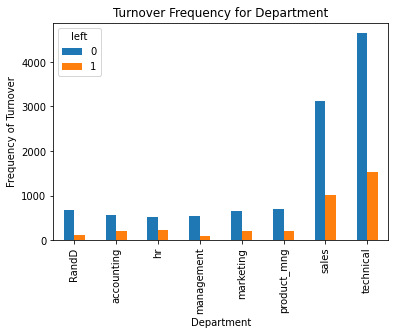

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

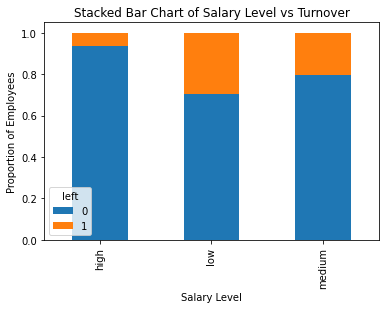

In [0]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

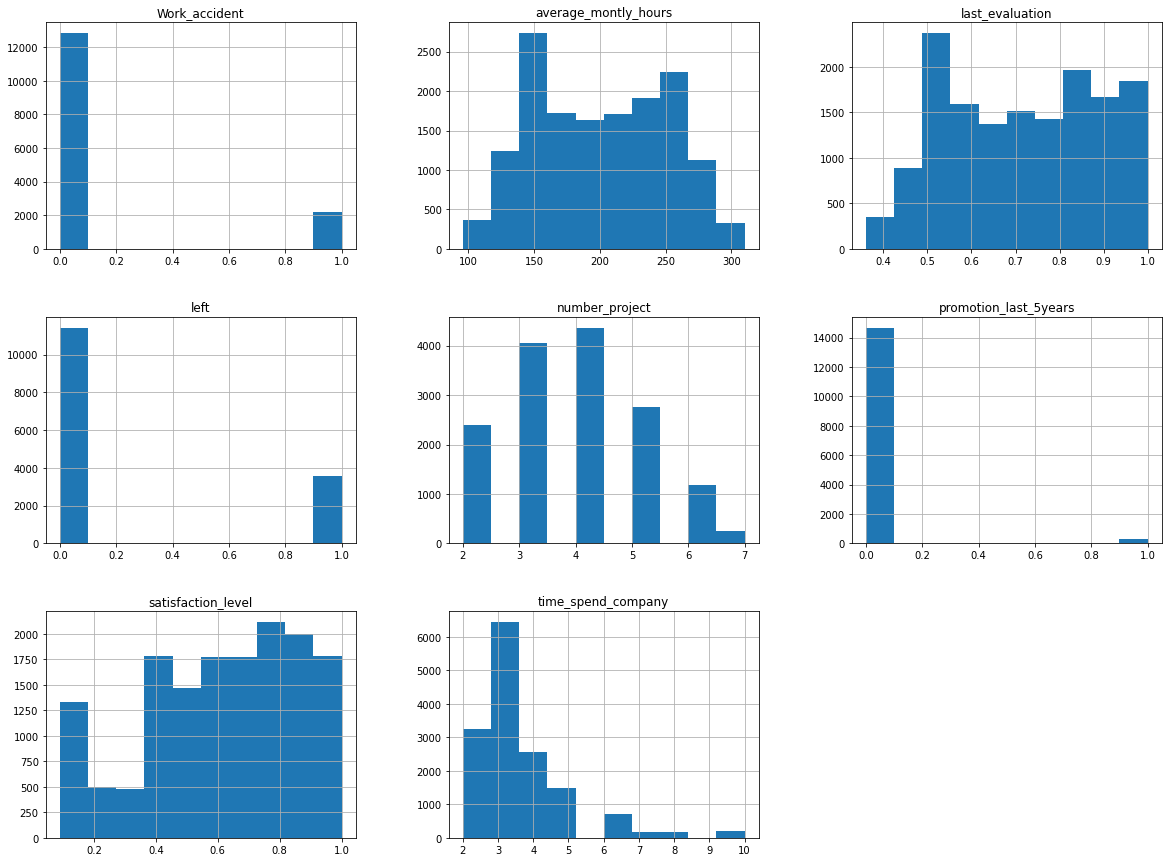

In [0]:
num_bins = 10
hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()